Plot a frequency distribution of refinement boxes

In [1]:
import os
import time
from pathlib import Path
import numpy as np
import pickle
import matplotlib.animation as manimation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [2]:
dir = r"C:\Users\paoli\Documents\plot2d"

In [3]:
os.chdir(dir)
objects = []
# step  level time  j  i  w  h  dx 
# 0     1     2     3  4  5  6  7 
with (open("patches.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
a = objects[0]
print(f"Box database dimensions: {a.shape}")

Box database dimensions: (30632, 8)


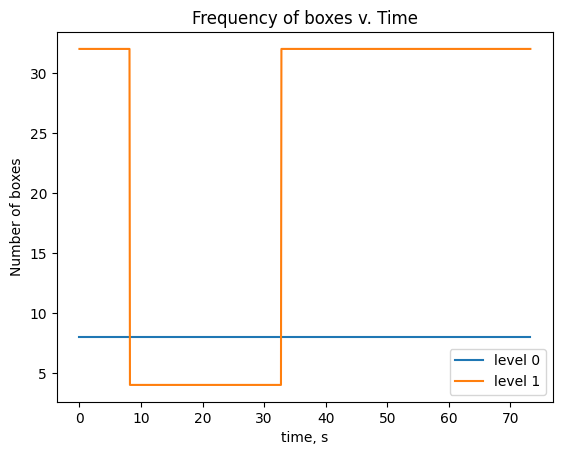

In [4]:
data0 = {}
data1 = {}
for box in range(a.shape[0]):
    t = a[box,2].item()
    if int(a[box,1]) == 1:   # level 1 box
        if t in data1:
            data1[t] += 1
        else:
            data1.update({t:1})
    elif int(a[box,1]) == 0:   # level 0 box
        if t in data0:
            data0[t] += 1
        else:
            data0.update({t:1})
plt.plot(data0.keys(), data0.values(), label="level 0")
plt.plot(data1.keys(), data1.values(), label="level 1")
plt.xlabel('time, s')
plt.ylabel('Number of boxes')
plt.title('Frequency of boxes v. Time')
plt.legend()